In [11]:
# cargar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# sacar datos de fbref
df = pd.read_html("https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats")[0]

# arreglar el problema con las columnas dobles
df.columns = [' '.join(col).strip() for col in df.columns]

df = df.reset_index(drop=True)

# crear columna con los nuevos nombres
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # para quedarnos con el último nombre
  else:
      new_col = col
  new_columns.append(new_col)

# renombrar columnas
df.columns = new_columns
df = df.fillna(0)

df_prem = df[df["Comp"] == "eng Premier League"] # escoger liga

df_prem = df_prem[["Player", "Pos", "Squad", "90s", "Standard Gls", "Standard Sh/90", "Standard G/Sh"]] # escoger columnas necesarias

convert_dict = {"90s": float,
                "Standard Gls": int, # cambiar el tipo de algunas columnas usando un diccionario
                "Standard Sh/90": float,
                "Standard G/Sh": float
                }
 
df_prem = df_prem.astype(convert_dict) # aplicar el diccionario al df

df_prem_plot = df_prem[(df_prem["90s"] >= 9.99) & (df_prem["Standard Sh/90"] >= 0.99)] # filtrar según el gráfico original

df_prem_plot["shot_conversion_rate"] = (df_prem_plot["Standard G/Sh"] * 100).round(1) # redondear el porcentaje

df_prem_plot["first_name"] = df_prem_plot["Player"].apply(lambda x: x.split()[0])
df_prem_plot['surname'] = df_prem_plot["Player"].apply(lambda x: ' '.join(x.split()[1:])) # crear nueva columna para el nombre que usaremos en el gráfico

# Crear la columna
df_prem_plot["name_plot"] = df_prem_plot["first_name"].str[0] + '. ' + df_prem_plot["surname"]

df_prem_plot_top_20 = df_prem_plot.sort_values("Standard Gls", ascending = False).head(20) # crear dos dataframes para luego usarlos para graficar el top 20 
df_prem_plot_top_5 = df_prem_plot.sort_values("Standard Gls", ascending = False).head(5) # y top 5 goleadores

C:\Users\roger\AppData\Local\Temp\ipykernel_1412\3607043794.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prem_plot["shot_conversion_rate"] = (df_prem_plot["Standard G/Sh"] * 100).round(1) # redondear el porcentaje
C:\Users\roger\AppData\Local\Temp\ipykernel_1412\3607043794.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prem_plot["first_name"] = df_prem_plot["Player"].apply(lambda x: x.split()[0])
C:\Users\roger\AppData\Local\Temp\ipykernel_1412\3607043794.py:39: SettingWithCopyWarning: 


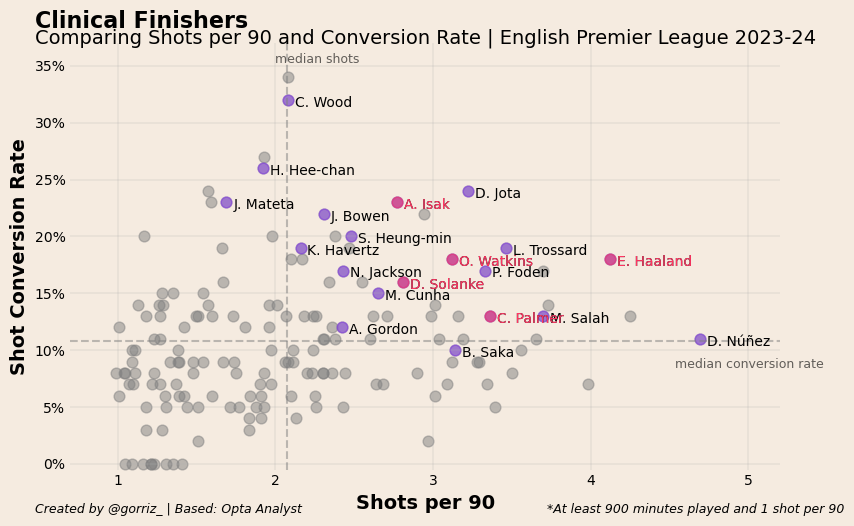

In [13]:
fig, ax = plt.subplots(figsize = (8, 5))
fig.set_facecolor("#f5ebe0") # definir tamaño y color del fondo del gráfico
ax.patch.set_facecolor("#f5ebe0")

ax.set_xlim(0.7, 5.2)
ax.set_ylim(-0.5, 37) # señalar los limites de las axis
ax.grid(alpha = 0.2, linewidth = 1.2)

spines = ["top", "right", "bottom", "left"]
for s in spines: # quitar los bordes de las axis
    if s in ["top", "right", "bottom", "left"]:
        ax.spines[s].set_visible(False)

ax.scatter(df_prem_plot["Standard Sh/90"], df_prem_plot["shot_conversion_rate"], color = "grey", alpha = 0.5, s = 60)
ax.scatter(df_prem_plot_top_20["Standard Sh/90"], df_prem_plot_top_20["shot_conversion_rate"], color = "#8338ec", alpha = 0.5, s = 60) # graficar los puntos
ax.scatter(df_prem_plot_top_5["Standard Sh/90"], df_prem_plot_top_5["shot_conversion_rate"], color = "#ff3562", alpha = 0.5, s = 60)

fig.text(0.05, 1, "Clinical Finishers", fontsize = 16, fontweight = "bold") # título y subtitulo
fig.text(0.05, 0.97, "Comparing Shots per 90 and Conversion Rate | English Premier League 2023-24", fontweight = "regular", fontsize = 14)

ax.set_xlabel("Shots per 90", fontweight = "bold", fontsize = 14)
ax.set_ylabel("Shot Conversion Rate", fontweight = "bold", fontsize = 14)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"]) # decorar los titulos de las axis, los ticks y las líneas de promedio
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35], ["0%", "5%", "10%", "15%", "20%", "25%", "30%", "35%"])
plt.axvline(x=np.nanmean(df_prem_plot["Standard Sh/90"]), alpha = 0.5, color = "grey", linestyle = "--")
plt.axhline(y=np.nanmean(df_prem_plot["shot_conversion_rate"]), alpha = 0.5, color = "grey", linestyle = "--")

fig.text(0.05, 0.03, "Created by @gorriz_ | Based: Opta Analyst",
        fontstyle = "italic",fontsize = 9)
fig.text(0.69, 0.03, "*At least 900 minutes played and 1 shot per 90", # crear la leyenda
        fontstyle = "italic",fontsize = 9)
fig.text(0.35, 0.93, "median shots", fontsize = 9, alpha = 0.6)
fig.text(0.85, 0.32, "median conversion rate", fontsize = 9, alpha = 0.6) # añadir información para las líneas de promedio

# poner los nombres de los jugadores que nos interesan
for idx, row in df_prem_plot_top_20.iterrows():
    ax.annotate(row["name_plot"], (row["Standard Sh/90"], row["shot_conversion_rate"]), xytext=(5,-5), textcoords='offset points')

for idx, row in df_prem_plot_top_5.iterrows():
    ax.annotate(row["name_plot"], (row["Standard Sh/90"], row["shot_conversion_rate"]), xytext=(5,-5), textcoords='offset points', color = "#ff3562")

plt.tight_layout()
plt.show()